<a href="https://colab.research.google.com/github/ipw0630/project_etl/blob/main/EXERCISE_WEEK_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install PySpark

In [1]:
! pip install pyspark

In [2]:
! wget https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv

--2024-05-12 07:30:49--  https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45038760 (43M) [text/plain]
Saving to: ‘online-retail-dataset.csv.1’

online-retail-datas 100%[===================>]  42.95M   174MB/s    in 0.2s    

2024-05-12 07:30:50 (174 MB/s) - ‘online-retail-dataset.csv.1’ saved [45038760/45038760]



In [3]:
from pyspark.sql import SparkSession

In [4]:
spark_session = SparkSession.builder.appName('dibimbing').master('local').getOrCreate()

# Configuration

In [5]:
from pyspark.sql.types import *
schema = StructType([
    StructField('invoice_no', IntegerType()),
    StructField('stock_code', StringType()),
    StructField('description', StringType()),
    StructField('quantity', IntegerType()),
    StructField('invoice_timestamp', StringType()),
    StructField('unit_price', DoubleType()),
    StructField('customer_id', IntegerType()),
    StructField('country_name', StringType()),
])
df = spark_session.read.csv('/content/online-retail-dataset.csv', header=True, schema=schema)
df.show(5)

+----------+----------+--------------------+--------+-----------------+----------+-----------+--------------+
|invoice_no|stock_code|         description|quantity|invoice_timestamp|unit_price|customer_id|  country_name|
+----------+----------+--------------------+--------+-----------------+----------+-----------+--------------+
|    536365|    85123A|WHITE HANGING HEA...|       6|   12/1/2010 8:26|      2.55|      17850|United Kingdom|
|    536365|     71053| WHITE METAL LANTERN|       6|   12/1/2010 8:26|      3.39|      17850|United Kingdom|
|    536365|    84406B|CREAM CUPID HEART...|       8|   12/1/2010 8:26|      2.75|      17850|United Kingdom|
|    536365|    84029G|KNITTED UNION FLA...|       6|   12/1/2010 8:26|      3.39|      17850|United Kingdom|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|   12/1/2010 8:26|      3.39|      17850|United Kingdom|
+----------+----------+--------------------+--------+-----------------+----------+-----------+--------------+
only showi

# Dataset Cleaning & Transformation

In [6]:
import pyspark.sql.functions as F
df = df.withColumn('invoice_timestamp',F.to_timestamp('invoice_timestamp', format='M/d/yyyy H:m'))
df.show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|      17850|United Kingdom|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------

In [7]:
df = df.withColumn('created_by', F.lit('Cashier'))

In [8]:
df.show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|created_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Cashier|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Cashier|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|      17850|United Kingdom|   Cashier|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Cashier|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Cashier|
+----------+----

In [9]:
df = df.withColumn('created_by',
                   F.when(F.to_date('invoice_timestamp') == F.to_date(F.lit('2010-12-01')), 'Owner')\
                  .otherwise('Cashier')
                   )
df.show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|created_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|     Owner|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|     Owner|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|      17850|United Kingdom|     Owner|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|     Owner|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|     Owner|
+----------+----

In [10]:
df.where(F.to_date('invoice_timestamp') != F.to_date(F.lit('2010-12-01'))).show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|created_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|    536598|     21421|PORCELAIN ROSE LA...|      12|2010-12-02 07:48:00|      1.25|      13090|United Kingdom|   Cashier|
|    536598|     21422|PORCELAIN ROSE SMALL|      16|2010-12-02 07:48:00|      0.85|      13090|United Kingdom|   Cashier|
|    536598|     22178|VICTORIAN GLASS H...|      24|2010-12-02 07:48:00|      1.25|      13090|United Kingdom|   Cashier|
|    536598|     22617|BAKING SET SPACEB...|      24|2010-12-02 07:48:00|      4.25|      13090|United Kingdom|   Cashier|
|    536599|     22968|ROSE COTTAGE KEEP...|       8|2010-12-02 07:49:00|       8.5|      15694|United Kingdom|   Cashier|
+----------+----

In [11]:
df = df.withColumn('created_by',
                   F.when(F.to_date('invoice_timestamp') == F.to_date(F.lit('2010-12-01')), 'Owner')\
                  .otherwise(
                      F.when(F.to_date('invoice_timestamp') == F.to_date(F.lit('2010-12-02')), 'Admin')\
                      .otherwise('Cashier')
                  )
                )
df.where(F.to_date('invoice_timestamp') == F.to_date(F.lit('2010-12-03'))).show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|created_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+----------+
|    536847|     22155|STAR DECORATION R...|      48|2010-12-03 09:31:00|      0.42|      17135|United Kingdom|   Cashier|
|    536847|     21807|WHITE CHRISTMAS S...|      36|2010-12-03 09:31:00|      0.42|      17135|United Kingdom|   Cashier|
|    536847|     22161|HEART DECORATION ...|      24|2010-12-03 09:31:00|      0.65|      17135|United Kingdom|   Cashier|
|    536847|     22065|CHRISTMAS PUDDING...|      24|2010-12-03 09:31:00|      1.45|      17135|United Kingdom|   Cashier|
|    536847|     20956|PORCELAIN T-LIGHT...|      12|2010-12-03 09:31:00|      1.25|      17135|United Kingdom|   Cashier|
+----------+----

In [12]:
df = df.withColumnRenamed('created_by','added_by')
df.show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|added_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Owner|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|      17850|United Kingdom|   Owner|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|
|    536365|     22752|SET 7 BAB

In [13]:
dedup_df = df.dropDuplicates(subset=['invoice_no'])
dedup_df.show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|added_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|      NULL|         D|            Discount|      -1|2010-12-01 09:41:00|      27.5|      14527|United Kingdom|   Owner|
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Owner|
|    536366|     22633|HAND WARMER UNION...|       6|2010-12-01 08:28:00|      1.85|      17850|United Kingdom|   Owner|
|    536367|     84879|ASSORTED COLOUR B...|      32|2010-12-01 08:34:00|      1.69|      13047|United Kingdom|   Owner|
|    536368|     22960|JAM MAKING SET WI...|       6|2010-12-01 08:34:00|      4.25|      13047|United Kingdom|   Owner|
|    536369|     21756|BATH BUIL

In [14]:
dedup_df.na.drop(subset=['invoice_no']).show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|added_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Owner|
|    536366|     22633|HAND WARMER UNION...|       6|2010-12-01 08:28:00|      1.85|      17850|United Kingdom|   Owner|
|    536367|     84879|ASSORTED COLOUR B...|      32|2010-12-01 08:34:00|      1.69|      13047|United Kingdom|   Owner|
|    536368|     22960|JAM MAKING SET WI...|       6|2010-12-01 08:34:00|      4.25|      13047|United Kingdom|   Owner|
|    536369|     21756|BATH BUILDING BLO...|       3|2010-12-01 08:35:00|      5.95|      13047|United Kingdom|   Owner|
+----------+----------+---------

In [15]:
dedup_df.na.fill({'invoice_no':1}).show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|added_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|         1|         D|            Discount|      -1|2010-12-01 09:41:00|      27.5|      14527|United Kingdom|   Owner|
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Owner|
|    536366|     22633|HAND WARMER UNION...|       6|2010-12-01 08:28:00|      1.85|      17850|United Kingdom|   Owner|
|    536367|     84879|ASSORTED COLOUR B...|      32|2010-12-01 08:34:00|      1.69|      13047|United Kingdom|   Owner|
|    536368|     22960|JAM MAKING SET WI...|       6|2010-12-01 08:34:00|      4.25|      13047|United Kingdom|   Owner|
+----------+----------+---------

In [16]:
df.withColumn('description', F.initcap('description')).show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|added_by|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+
|    536365|    85123A|White Hanging Hea...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Owner|
|    536365|     71053| White Metal Lantern|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|
|    536365|    84406B|Cream Cupid Heart...|       8|2010-12-01 08:26:00|      2.75|      17850|United Kingdom|   Owner|
|    536365|    84029G|Knitted Union Fla...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|
|    536365|    84029E|Red Woolly Hottie...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|
|    536365|     22752|Set 7 Bab

In [17]:
df.withColumn('customer_id', F.col('customer_id').cast(StringType())).printSchema()

root
 |-- invoice_no: integer (nullable = true)
 |-- stock_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- invoice_timestamp: timestamp (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- added_by: string (nullable = false)



# DATA VISUALIZATION

In [18]:
df = df.withColumn('sub_total', F.round(F.col('quantity') * F.col('unit_price'),2))
df.show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+---------+
|invoice_no|stock_code|         description|quantity|  invoice_timestamp|unit_price|customer_id|  country_name|added_by|sub_total|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+--------+---------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|      17850|United Kingdom|   Owner|     15.3|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|    20.34|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|      17850|United Kingdom|   Owner|     22.0|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|      17850|United Kingdom|   Owner|    20.34|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39

In [19]:
df_total_per_day = df.groupBy(F.to_date('invoice_timestamp').alias('invoice_date'))\
                      .agg(F.round(F.sum('sub_total'),2).alias('total_per_day'))\
                      .orderBy('invoice_date',ascending=False)
df_total_per_day.show()

+------------+-------------+
|invoice_date|total_per_day|
+------------+-------------+
|  2011-12-09|     32131.53|
|  2011-12-08|     81417.78|
|  2011-12-07|     75076.22|
|  2011-12-06|     54228.37|
|  2011-12-05|     57751.32|
|  2011-12-04|     24565.78|
|  2011-12-02|     57086.06|
|  2011-12-01|     51410.95|
|  2011-11-30|     59150.98|
|  2011-11-29|      72219.2|
|  2011-11-28|     55442.02|
|  2011-11-27|      20571.5|
|  2011-11-25|     50442.72|
|  2011-11-24|     48080.28|
|  2011-11-23|      78480.7|
|  2011-11-22|     62307.32|
|  2011-11-21|      48302.5|
|  2011-11-20|     34902.01|
|  2011-11-18|      48031.8|
|  2011-11-17|     60329.72|
+------------+-------------+
only showing top 20 rows



# VISUALIZATION USING PANDAS

<Axes: xlabel='invoice_date'>

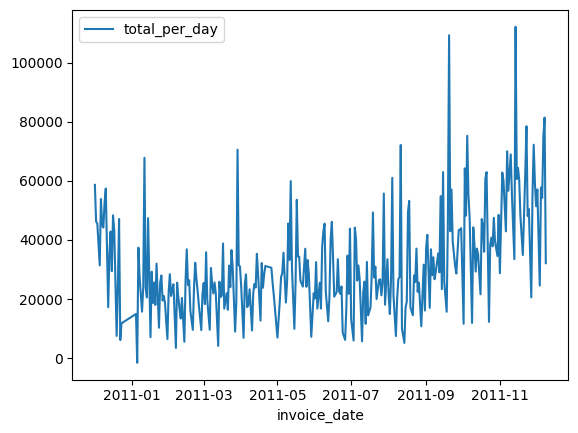

In [20]:
pandas_df_total_per_day = df_total_per_day.toPandas()
pandas_df_total_per_day.plot(x='invoice_date',y='total_per_day', kind='line')

# USING PLOTLY

In [21]:
! pip install plotly

In [22]:
import plotly.express as px
px.line(pandas_df_total_per_day, x='invoice_date',y='total_per_day').show()

In [23]:
df_transaction_count = df.groupBy(F.to_date('invoice_timestamp').alias('invoice_date'))\
                          .count().withColumnRenamed('count','transaction_count')\
                          .orderBy('invoice_date')
df_transaction_count.show()

+------------+-----------------+
|invoice_date|transaction_count|
+------------+-----------------+
|  2010-12-01|             3108|
|  2010-12-02|             2109|
|  2010-12-03|             2202|
|  2010-12-05|             2725|
|  2010-12-06|             3878|
|  2010-12-07|             2963|
|  2010-12-08|             2647|
|  2010-12-09|             2891|
|  2010-12-10|             2758|
|  2010-12-12|             1451|
|  2010-12-13|             2283|
|  2010-12-14|             2087|
|  2010-12-15|             1349|
|  2010-12-16|             1790|
|  2010-12-17|             3115|
|  2010-12-19|              522|
|  2010-12-20|             1763|
|  2010-12-21|             1586|
|  2010-12-22|              291|
|  2010-12-23|              963|
+------------+-----------------+
only showing top 20 rows



In [24]:
pandas_df_transaction_count = df_transaction_count.toPandas()
px.bar(pandas_df_transaction_count, x='invoice_date', y='transaction_count', title='Daily Sales Transaction Amount').show()

In [25]:
df_transaction_hourly = df.groupBy(F.date_format('invoice_timestamp', 'H').cast(IntegerType()).alias('transaction_hour'))\
                          .count().withColumnRenamed('count','transaction_count')\
                          .orderBy('transaction_hour')
df_transaction_hourly.show()

+----------------+-----------------+
|transaction_hour|transaction_count|
+----------------+-----------------+
|               6|               41|
|               7|              383|
|               8|             8909|
|               9|            34332|
|              10|            49037|
|              11|            57674|
|              12|            78709|
|              13|            72259|
|              14|            67471|
|              15|            77519|
|              16|            54516|
|              17|            28509|
|              18|             7974|
|              19|             3705|
|              20|              871|
+----------------+-----------------+



In [26]:
pandas_df_transaction_hourly = df_transaction_hourly.toPandas()
px.bar(pandas_df_transaction_hourly, x='transaction_hour', y='transaction_count', title='Hourly Sales Transaction Amount').show()

In [27]:
df_transaction_per_country = df.groupBy('country_name')\
                          .count().withColumnRenamed('count','transaction_count')\
                          .orderBy('transaction_count', ascending=False)
df_transaction_per_country.show()

+---------------+-----------------+
|   country_name|transaction_count|
+---------------+-----------------+
| United Kingdom|           495478|
|        Germany|             9495|
|         France|             8557|
|           EIRE|             8196|
|          Spain|             2533|
|    Netherlands|             2371|
|        Belgium|             2069|
|    Switzerland|             2002|
|       Portugal|             1519|
|      Australia|             1259|
|         Norway|             1086|
|          Italy|              803|
|Channel Islands|              758|
|        Finland|              695|
|         Cyprus|              622|
|         Sweden|              462|
|    Unspecified|              446|
|        Austria|              401|
|        Denmark|              389|
|          Japan|              358|
+---------------+-----------------+
only showing top 20 rows



In [28]:
pandas_df_transaction_per_country = df_transaction_per_country.toPandas()
pandas_df_transaction_per_country.loc[pandas_df_transaction_per_country['transaction_count']<2500, 'country_name'] = 'Others'
fig_pie = px.pie(pandas_df_transaction_per_country, values='transaction_count', names='country_name')
fig_pie.show()

# USING KALEIDO

In [29]:
!pip install -U kaleido

In [30]:
fig_pie.write_image('country.png')